In [522]:
# put all RGB values into a 2D array 
# loop through array?
# use array to create map of greenness, snow, or whatever Paul wants
# use im.getdata?

In [523]:
%matplotlib inline
import pandas as pd
import xarray as xr
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import glob
import math
import scipy
import sklearn
import tesseract

SyntaxError: invalid syntax (__init__.py, line 34)

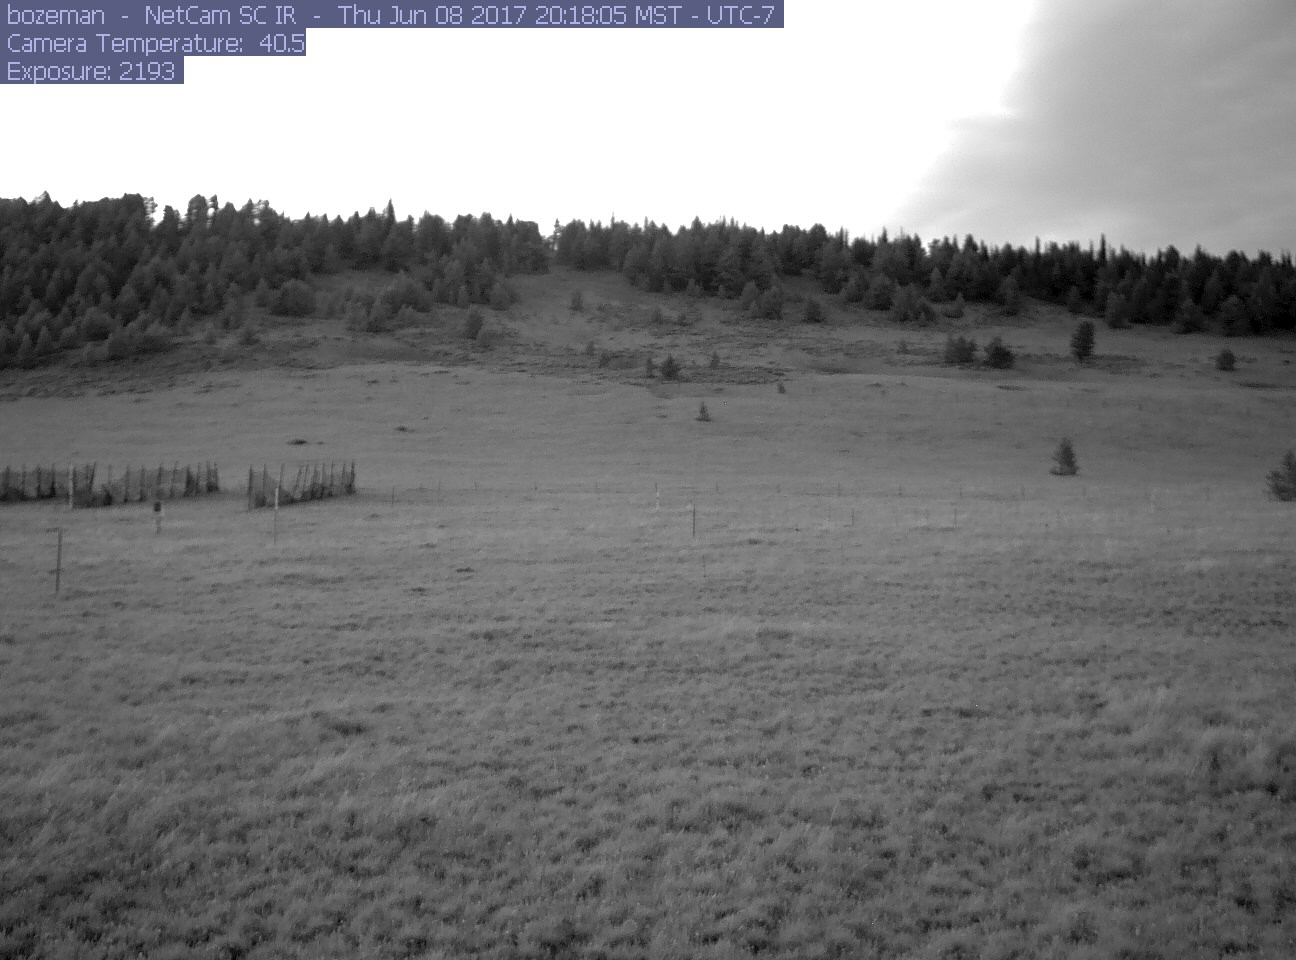

In [528]:
# shows IR photo

ir_test_photo = 'https://phenocam.sr.unh.edu/data/archive/bozeman/2017/06/bozeman_IR_2017_06_08_201805.jpg'
response = requests.get(ir_test_photo)
IR_img = Image.open(BytesIO(response.content))
IR_img_exp = 2193
IR_img

In [529]:
photo = requests.get('https://phenocam.sr.unh.edu/data/archive/bozeman/2017/06/')

In [530]:
photo

<Response [403]>

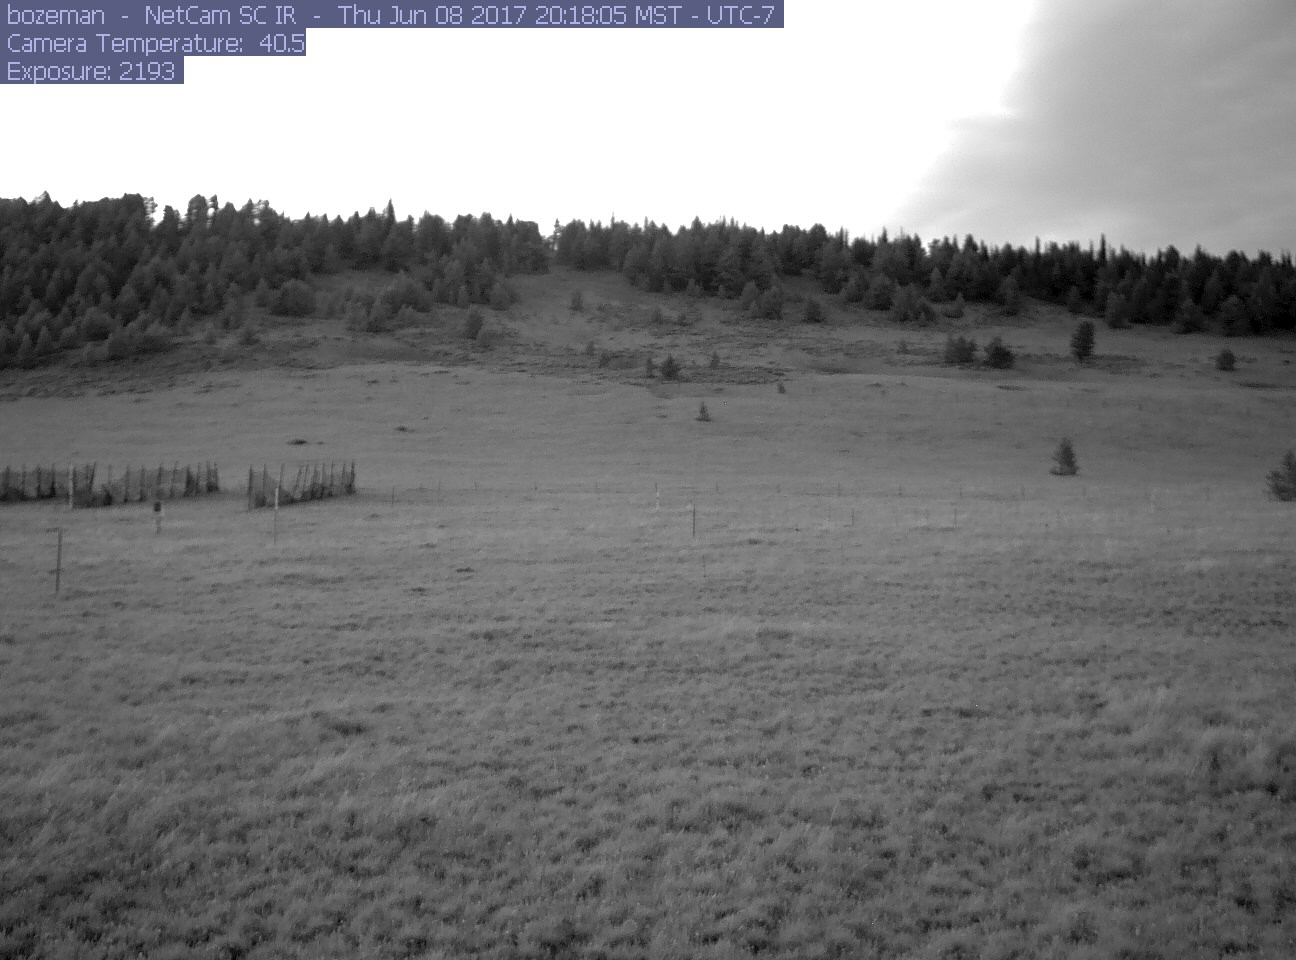

In [531]:
# crops photo

width = IR_img.size[0]
height = IR_img.size[1]
chop_IR_img = IR_img.crop(
    (
        width - 1296,
        height - 960,
        width,
        height
    )
)
chop_IR_img

In [532]:
# finds all pixel values for IR image

width, height = chop_IR_img.size
IR_pixel_values = list(chop_IR_img.getdata())
IR_pixel_values = np.array(IR_pixel_values).reshape((width, height, 3))

In [533]:
# averages all IR pixel data (returns a single number)

x = (np.average(IR_pixel_values, axis=0))
y = np.average(x, axis=0)
IR_ave = np.average(y, axis=0)

In [534]:
#break

In [535]:
# shows visual photo

vis_test_photo = 'https://phenocam.sr.unh.edu/data/archive/bozeman/2017/06/bozeman_2017_06_08_184805.jpg'
response = requests.get(vis_test_photo)
VIS_img = Image.open(BytesIO(response.content))
VIS_img
VIS_img_exp = 159

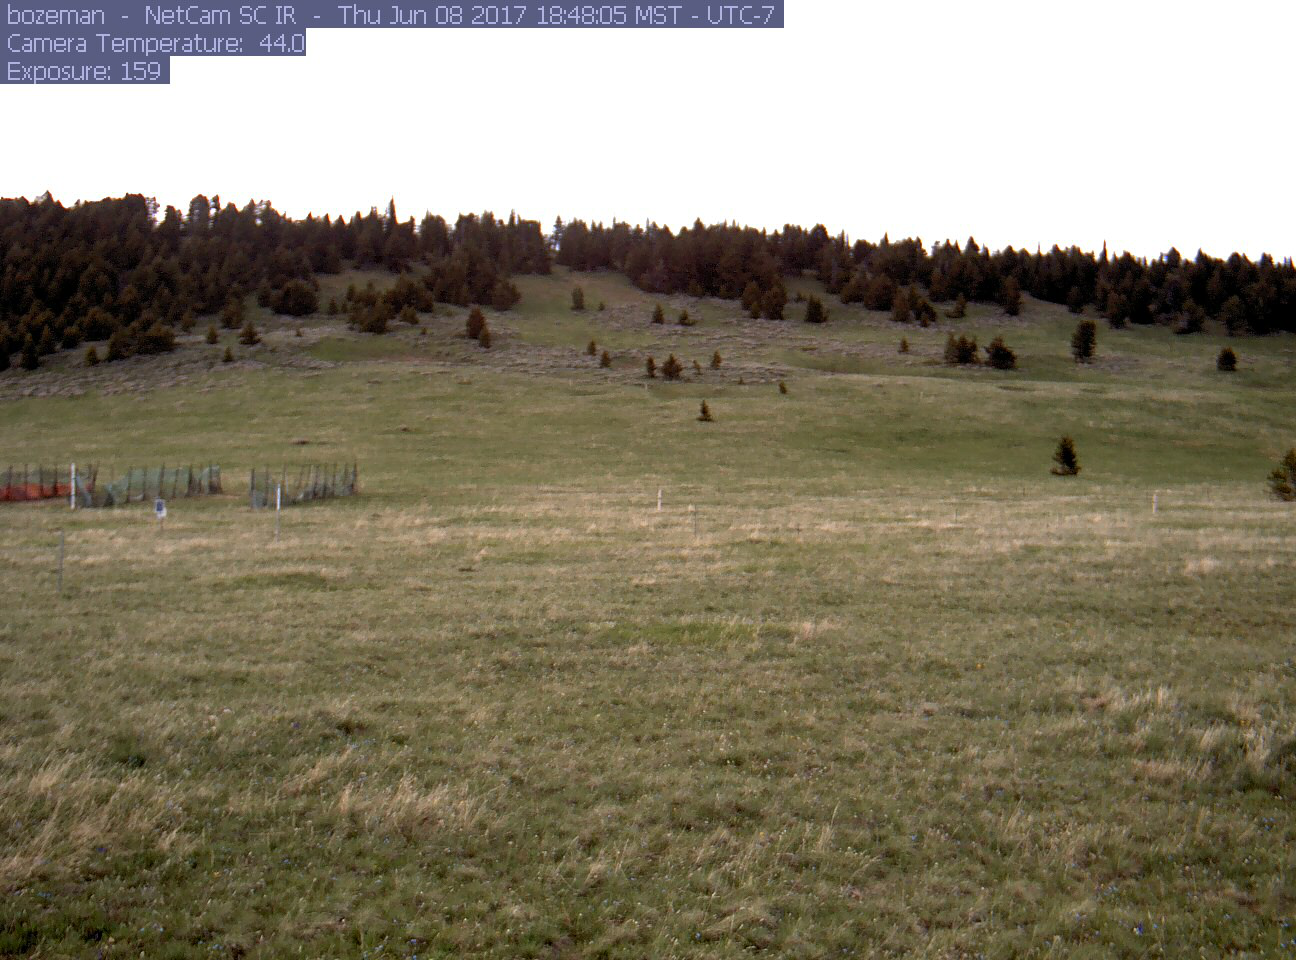

In [536]:
# crops photo

width = VIS_img.size[0]
height = VIS_img.size[1]
chop_vis_img = VIS_img.crop(
    (
        width - 1296,
        height - 960,
        width,
        height
    )
)
chop_vis_img

In [537]:
chop_vis_img.size

(1296, 960)

In [538]:
# finds all pixel values for visual image

width, height = chop_vis_img.size
vis_pixel_values = list(chop_vis_img.getdata())
vis_pixel_values = np.array(vis_pixel_values).reshape((width, height, 3))
#vis_pixel_values

In [539]:
vis_pixel_values.shape

(1296, 960, 3)

In [540]:
# averages all visual pixel data (returns red average)
x = (np.average(vis_pixel_values, axis=0))
r_ave = np.average(x, axis=0)
red_ave = r_ave.item(0)
red_ave

133.76350951646094

In [541]:
# averages all visual pixel data (returns green average)

x = (np.average(vis_pixel_values, axis=1))
g_ave = np.average(x, axis=1)
green_ave = g_ave.item(1)
green_ave

156.87465277777778

In [542]:
# averages all viusal pixel data (returns blue average)

x = (np.average(vis_pixel_values, axis = 2))
b_ave = np.average(x, axis = 1)
blue_ave = b_ave.item(2)
blue_ave

184.3972222222222

In [543]:
#break

In [544]:
# calculates average NDVI?

ndvi = (IR_ave - red_ave)/(IR_ave + red_ave)
ndvi

-0.04527927451722525

In [545]:
# calculates green chromatic coodinate

gcc = green_ave/(red_ave+blue_ave+green_ave)
gcc

0.33023782625679704

In [546]:
# calculates excess green

eg = 2*green_ave-(red_ave+blue_ave)
eg

-4.41142618312756

In [547]:
VIS_img.size

(1296, 960)

In [548]:
# calculating all red values 

x=0
y=0
width,height = VIS_img.size
red_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        red_array[x,y] = vis_pixel_values[x,y,0]
#red_array

In [549]:
red_array.shape

(1296, 960)

In [550]:
# finding r'
r_prime = red_array/math.sqrt(VIS_img_exp)
#r_prime

In [551]:
# calculating all green values 

x=0
y=0
width,height = chop_vis_img.size
green_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        green_array[x,y] = vis_pixel_values[x,y,1]
#green_array

In [552]:
# finding g'
g_prime = green_array/math.sqrt(VIS_img_exp)
#g_prime

In [553]:
# calculating all blue values

x=0
y=0
width,height = chop_vis_img.size
blue_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        blue_array[x,y] = vis_pixel_values[x,y,2]
#blue_array

In [554]:
# finding b'
b_prime = blue_array/math.sqrt(VIS_img_exp)
#b_prime

In [555]:
# calculating all IR values

x=0
y=0
width,height = chop_IR_img.size
IR_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        IR_array[x,y] = IR_pixel_values[x,y,0]
#IR_array

In [556]:
# finding z' RGB+IR????

z = (red_array + green_array + blue_array) + IR_array

z_prime = z/math.sqrt(IR_img_exp)
z_prime

array([[  8.49892029,   8.49892029,   8.52027436, ...,  21.78115251,
         21.78115251,  21.78115251],
       [ 21.78115251,  21.78115251,  21.78115251, ...,   8.52027436,
          8.52027436,   8.52027436],
       [  8.99006393,   9.50256163,   8.64839879, ...,   8.39214994,
          8.32808772,   8.58433658],
       ..., 
       [  4.91143635,   5.01820671,   5.03956078, ...,   8.37079587,
          7.94371444,   9.09683428],
       [  8.07183887,   7.66611152,   9.39579128, ...,   6.34215911,
          7.83694409,   9.90828898],
       [ 10.76245183,   9.78016456,   8.1999633 , ...,   5.63747477,
          5.76559919,   5.23174742]])

In [557]:
# finding y'

y_prime = 0.30*red_array + 0.59*green_array + 0.11*blue_array
y_prime

array([[  96.02,   96.02,   95.65, ...,  255.  ,  255.  ,  255.  ],
       [ 255.  ,  255.  ,  255.  , ...,   95.65,   95.65,   95.65],
       [ 100.87,  106.87,   96.87, ...,   93.87,   92.98,   95.98],
       ..., 
       [  64.31,   60.31,   65.91, ...,  109.09,  102.09,  118.87],
       [  98.25,   91.25,  127.03, ...,   72.82,   96.3 ,  129.3 ],
       [ 137.27,  129.05,  106.05, ...,   72.02,   74.25,   65.92]])

In [558]:
# finding x'   X′ = Z′ −Y′   z'=z/sqrt(exposure of RGB+IR)

x_prime = z_prime - y_prime
x_prime

array([[ -87.52107971,  -87.52107971,  -87.12972564, ..., -233.21884749,
        -233.21884749, -233.21884749],
       [-233.21884749, -233.21884749, -233.21884749, ...,  -87.12972564,
         -87.12972564,  -87.12972564],
       [ -91.87993607,  -97.36743837,  -88.22160121, ...,  -85.47785006,
         -84.65191228,  -87.39566342],
       ..., 
       [ -59.39856365,  -55.29179329,  -60.87043922, ..., -100.71920413,
         -94.14628556, -109.77316572],
       [ -90.17816113,  -83.58388848, -117.63420872, ...,  -66.47784089,
         -88.46305591, -119.39171102],
       [-126.50754817, -119.26983544,  -97.8500367 , ...,  -66.38252523,
         -68.48440081,  -60.68825258]])

In [581]:
# camera NDVI

a = (x_prime - r_prime) 
b = (x_prime + r_prime)
a/b

/Users/BillVandenberg/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


array([[ 1.1754388 ,  1.1754388 ,  1.17629627, ...,  1.18988913,
         1.18988913,  1.18988913],
       [ 1.18988913,  1.18988913,  1.18988913, ...,  1.17629627,
         1.17629627,  1.17629627],
       [ 1.17659847,  1.17734322,  1.17605082, ...,  1.17560952,
         1.17525626,  1.17571268],
       ..., 
       [ 1.20944342,  1.2126299 ,  1.21339577, ...,  1.21446864,
         1.21659177,  1.21259812],
       [ 1.20989146,  1.21197274,  1.20351911, ...,  1.20229787,
         1.19695184,  1.19381085],
       [ 1.19694264,  1.19723356,  1.19967161, ...,  1.20842903,
         1.20983796,  1.21410496]])

In [582]:
# average ndvi

np.mean(camera_ndvi)

nan

In [561]:
#normalized image

img_ave = np.mean(chop_vis_img)
normalized_image = chop_vis_img / img_ave
#normalized_image

In [562]:
# exposure number

exp_img = VIS_img.crop((118, 58, 200, 85))
exp_img

In [563]:
# returns exposure number in text 

exp_num = pt.image_to_string(exp_img,config='nobatch digits')
print (exp_num)

159 -


In [564]:
exp_num[0:4]

'159 '

In [565]:
# image nonsense

plt.imshow(normalized_image)
plt.show()

In [566]:
camera_ndvi.mean()

nan

In [567]:
plt.pcolormesh(camera_ndvi, cmap=plt.cm.rainbow,vmin = 1.13, vmax=1.25)

/Users/BillVandenberg/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


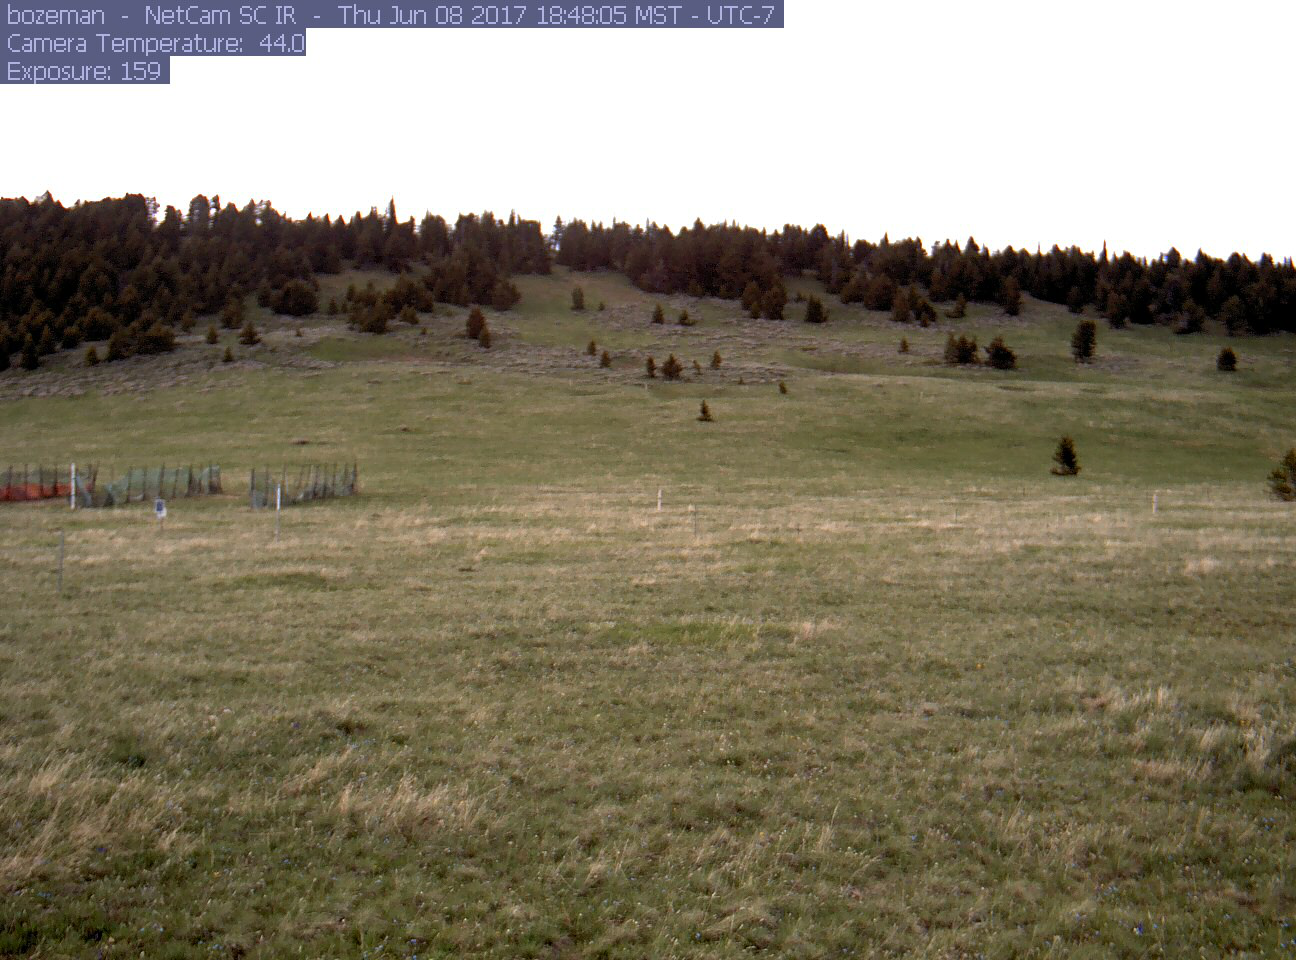

In [568]:
chop_vis_img